**matplotlib学习笔记**  
@author: Rui Zhu  
@creation time: 2023-02-03  
@cite:  
    1. [matplotlib官方教程](https://matplotlib.org/stable/tutorials/index.html)  
    2. [官方推荐的第三方示例](https://matplotlib.org/stable/users/resources/index.html#tutorials)

# 初级

## [Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### matplotlib中的基本概念:
* Figure(图布): 画图用的所有元素都画在figure上
* Axes(标架): 画具体图的地方
* Axis(坐标轴): 单个坐标轴对象
* Artist: 任何可以看见的都视为艺术家, 甚至是Figure, Axes...

### 创建Figure的方法

In [2]:
# 方法1: 创建一个空的figure, 而没有创建axes
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

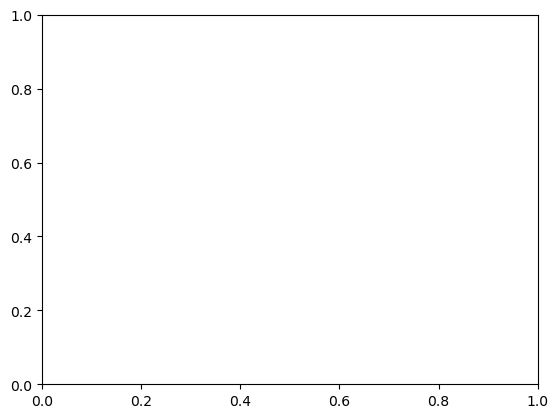

In [3]:
# 方法2: 同时创建figure和axes
fig, ax = plt.subplots()

### 两种使用matplotlib的风格

风格1: 明确的 _面向对象风格_
* 推荐用这个

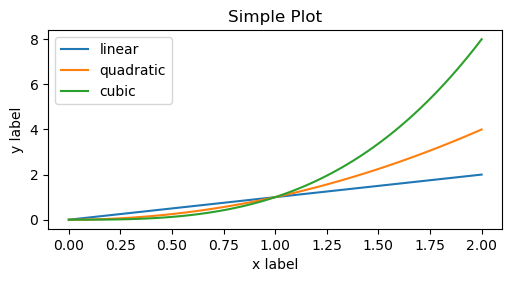

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

风格2: 简单的 _plt简约风_
* 简单画图使用

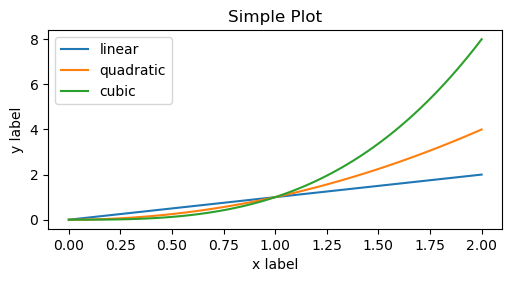

In [5]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

### 创建画图函数用于重复作图

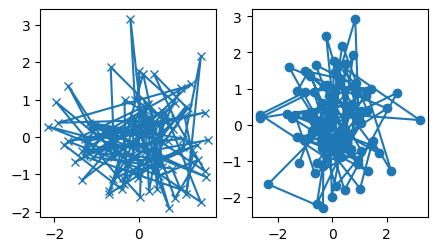

In [9]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### 个性化设置
* axes的画图函数中有各种自定义的参数设置
* 也可以用面向对象的方法设置

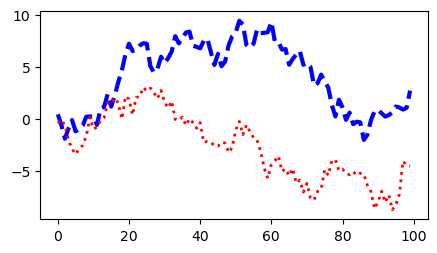

In [13]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')  # 面向对象的方法设置
l.set_color("red")

### 图中的说明文字

坐标轴名称, 图标题

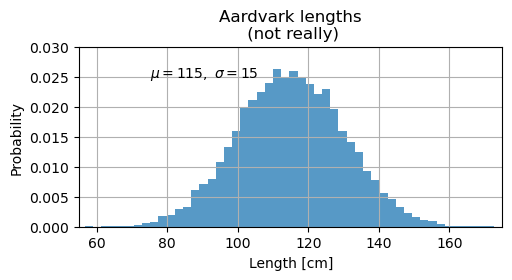

In [22]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

使用数学公式
* r的含义: 将字符串中的TeX字符\不视为python中的转义字符

Text(0.5, 1.0, '$\\sigma_i=15$')

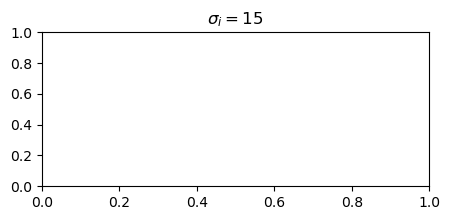

In [24]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title(r'$\sigma_i=15$')

注释

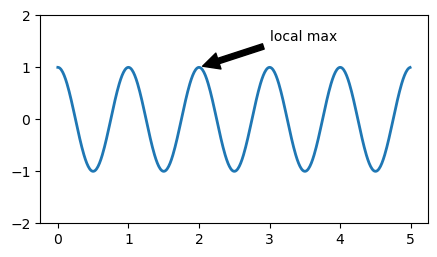

In [25]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

图例

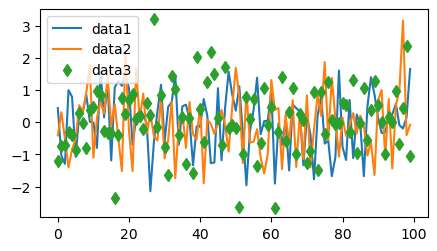

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

### 坐标轴的scales与刻度